In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

In [2]:
kernel_num1 = np.ones((3,3), np.uint8)
kernel_num2 = np.ones((3,3), np.uint8)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (9, 9))

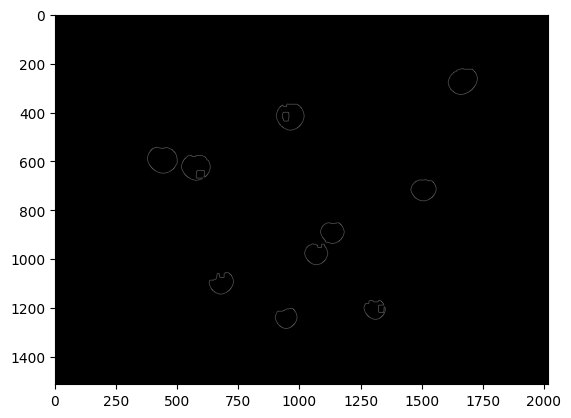

In [4]:
#
img = cv.imread('whiteballssample.jpg')
img_color = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_,img_color = cv.threshold(img_color, 0, 255,cv.THRESH_BINARY + cv.THRESH_OTSU)

img_ex_o = cv.morphologyEx(img_color, cv.MORPH_OPEN, kernel_num1)
img_hist = cv.equalizeHist(img_ex_o)
img_eros = cv.erode(img_hist, kernel_num2, iterations=8)
img_dil = cv.dilate(img_eros, kernel_num2, iterations=1)

img_ex_c = cv.morphologyEx(img_dil, cv.MORPH_CLOSE, kernel)
finish = cv.Canny(img_ex_c,50, 100,L2gradient = True)

plt.imshow(finish,cmap="gray" )

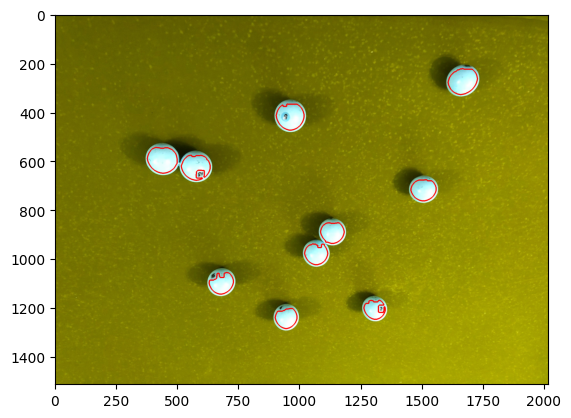

In [6]:
contours,_ = cv.findContours(finish, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img, contours, -1, (255,0,0), 3)#255,0,0
plt.imshow(img, cmap="gray")

In [23]:
#Количество шаров на фотографии:
counts = len(contours)
print(counts)

10


In [27]:
radiuses = []
for i in range (counts):
    radius = cv.minEnclosingCircle(contours[i])[1]
    radiuses.append(radius)
    print(f'Радиус шарика №{i}: r = {radius}')
    radiuses.append(radius)

Радиус шарика №0: r = 45.33208465576172
Радиус шарика №1: r = 44.14191436767578
Радиус шарика №2: r = 50.1442756652832
Радиус шарика №3: r = 48.201412200927734
Радиус шарика №4: r = 48.668495178222656
Радиус шарика №5: r = 51.97365188598633
Радиус шарика №6: r = 59.365596771240234
Радиус шарика №7: r = 61.92274856567383
Радиус шарика №8: r = 57.344879150390625
Радиус шарика №9: r = 61.179290771484375


In [45]:
#Средний радиус
mean_r = np.mean(radiuses)
print(mean_r)

52.82743492126465


In [46]:
#Дисперсия
var = np.var(radiuses)
print(var)

39.387678712177
